Epoch 1/10
391/391 - 185s - loss: 1.6079 - accuracy: 0.4123 - val_loss: 1.2701 - val_accuracy: 0.5386 - 185s/epoch - 472ms/step
Epoch 2/10
391/391 - 169s - loss: 1.2346 - accuracy: 0.5562 - val_loss: 1.0461 - val_accuracy: 0.6322 - 169s/epoch - 432ms/step
Epoch 3/10
391/391 - 162s - loss: 1.0570 - accuracy: 0.6254 - val_loss: 0.9439 - val_accuracy: 0.6708 - 162s/epoch - 415ms/step
Epoch 4/10
391/391 - 166s - loss: 0.9376 - accuracy: 0.6690 - val_loss: 0.8580 - val_accuracy: 0.7049 - 166s/epoch - 425ms/step
Epoch 5/10
391/391 - 125s - loss: 0.8671 - accuracy: 0.6956 - val_loss: 0.7870 - val_accuracy: 0.7240 - 125s/epoch - 320ms/step
Epoch 6/10
391/391 - 110s - loss: 0.8079 - accuracy: 0.7151 - val_loss: 0.7610 - val_accuracy: 0.7387 - 110s/epoch - 282ms/step
Epoch 7/10
391/391 - 109s - loss: 0.7539 - accuracy: 0.7353 - val_loss: 0.7334 - val_accuracy: 0.7422 - 109s/epoch - 278ms/step
Epoch 8/10
391/391 - 111s - loss: 0.7222 - accuracy: 0.7460 - val_loss: 0.7192 - val_accuracy: 0.7486 - 

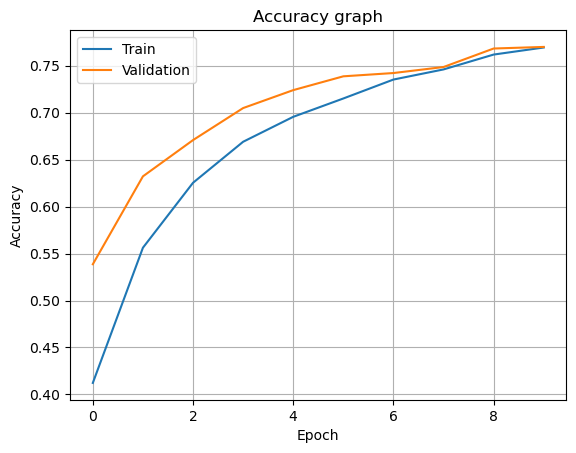

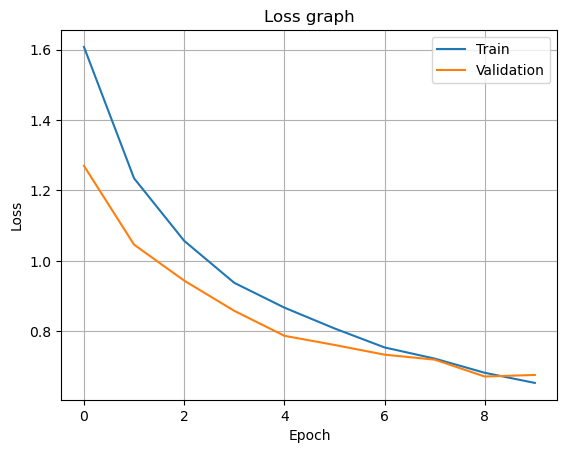

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

inputs = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

cnn = Model(inputs=inputs, outputs=outputs)

cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test), verbose=2)

res = cnn.evaluate(x_test, y_test, verbose=0)
print('정확률=', res[1] * 100)

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()
